In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest 
from collections import Counter

In [4]:
seeds_df = pd.read_csv("/content/sample_data/seeds_dataset.csv", sep='\t', header=None)

In [5]:
seeds = seeds_df.dropna(how='any')

In [6]:
seeds = seeds.drop([7],axis=1)

In [7]:
seeds = ( seeds - seeds.min()) / (seeds.max() - seeds.min()) 

In [8]:
seeds

,0,1,2,3,4,5,6
0,0.440982,0.502066,0.570780,0.486486,0.486101,0.192837,0.345150
1,0.405099,0.446281,0.662432,0.368806,0.501069,0.033497,0.215165
2,0.349386,0.347107,0.879310,0.220721,0.503920,0.256149,0.150665
3,0.306893,0.316116,0.793103,0.239302,0.533856,0.197870,0.140817
4,0.524079,0.533058,0.864791,0.427365,0.664291,0.078133,0.322994
...,...,...,...,...,...,...,...
205,0.151086,0.163223,0.637024,0.134009,0.250178,0.379594,0.172821
206,0.060434,0.097107,0.390200,0.135698,0.117605,0.471516,0.238306
207,0.246459,0.258264,0.727768,0.189752,0.429081,1.000000,0.264402
208,0.118036,0.165289,0.399274,0.155405,0.146828,0.375224,0.258493


In [9]:
seeds.columns = ['Area', 'Perimetro', 'Compacidad', 'Altura_k', 'Anchura_k', 'Coef_asim', 'Anchura_ranura']

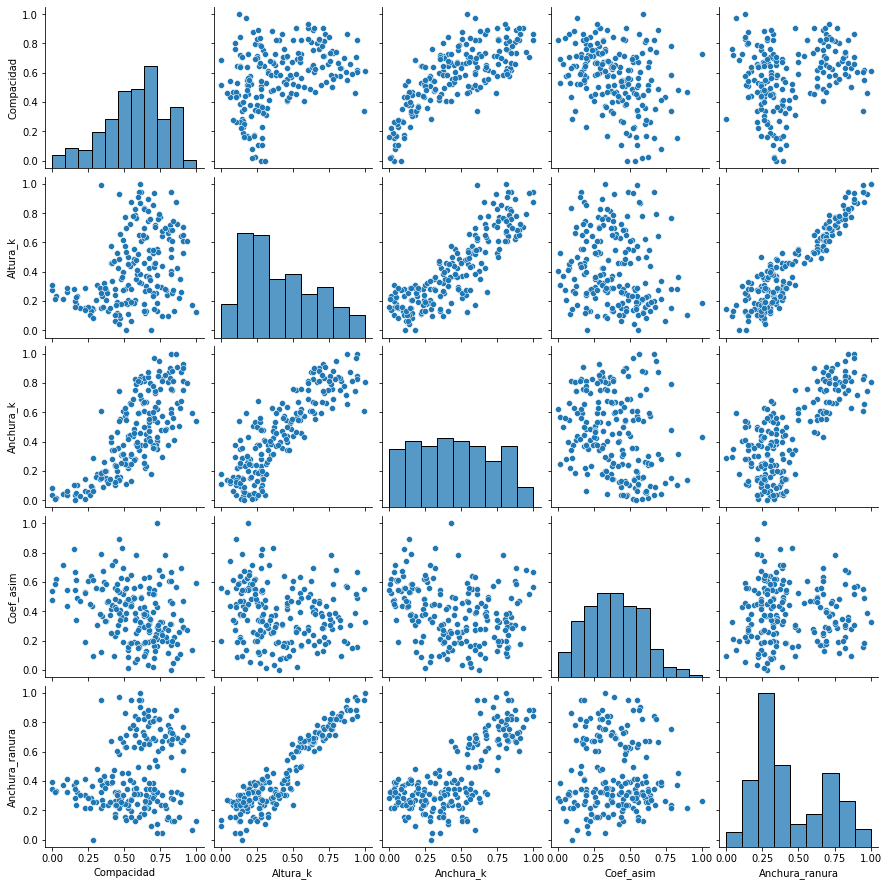

In [12]:
sns.pairplot(seeds)

In [11]:
seeds = seeds.drop(['Area', 'Perimetro'], axis=1)

In [94]:
IS_seeds = IsolationForest(n_estimators=100, max_samples=256, random_state=0).fit(seeds)
outliers_seeds = IS_seeds.score_samples(seeds)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:281: UserWarning: max_samples (256) is greater than the total number of samples (200). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples))


In [95]:
outliers_seeds = outliers_seeds * -1

In [96]:
outliers_seeds

array([0.43105358, 0.47182947, 0.46380737, 0.45103305, 0.47646272,
       0.43300285, 0.40932985, 0.41778341, 0.45571695, 0.45337234,
       0.43468462, 0.41490513, 0.45446058, 0.41629654, 0.42777786,
       0.46548075, 0.58948153, 0.47760556, 0.57718654, 0.41771878,
       0.42823691, 0.40344901, 0.5174823 , 0.45920829, 0.47867509,
       0.50018199, 0.43657191, 0.45213582, 0.40207029, 0.4086884 ,
       0.4802805 , 0.43741439, 0.45896836, 0.42282942, 0.42982267,
       0.4488214 , 0.49540256, 0.41240052, 0.49239526, 0.42050166,
       0.41503141, 0.46495821, 0.45554311, 0.43930323, 0.42492602,
       0.45738983, 0.41555536, 0.40124839, 0.43143934, 0.41847603,
       0.48700614, 0.46128865, 0.40612537, 0.51275647, 0.45825235,
       0.42463824, 0.48020581, 0.43005655, 0.5870942 , 0.52206268,
       0.52048627, 0.40489763, 0.47819795, 0.49921839, 0.43693141,
       0.42475394, 0.42274667, 0.46282331, 0.46706438, 0.45579041,
       0.51164001, 0.43358704, 0.46433692, 0.48108057, 0.52800

In [97]:
outliers_seeds[outliers_seeds< 0.56] = 0
outliers_seeds[outliers_seeds>=0.56] = 1


In [98]:
Counter(outliers_seeds)

Counter({0.0: 191, 1.0: 9})

In [99]:
list_outliers_seeds = seeds.index[outliers_seeds == 1]

In [100]:
list_outliers_seeds

Int64Index([16, 18, 59, 87, 88, 89, 94, 108, 114], dtype='int64')

In [101]:
seeds

,Compacidad,Altura_k,Anchura_k,Coef_asim,Anchura_ranura
0,0.570780,0.486486,0.486101,0.192837,0.345150
1,0.662432,0.368806,0.501069,0.033497,0.215165
2,0.879310,0.220721,0.503920,0.256149,0.150665
3,0.793103,0.239302,0.533856,0.197870,0.140817
4,0.864791,0.427365,0.664291,0.078133,0.322994
...,...,...,...,...,...
205,0.637024,0.134009,0.250178,0.379594,0.172821
206,0.390200,0.135698,0.117605,0.471516,0.238306
207,0.727768,0.189752,0.429081,1.000000,0.264402
208,0.399274,0.155405,0.146828,0.375224,0.258493


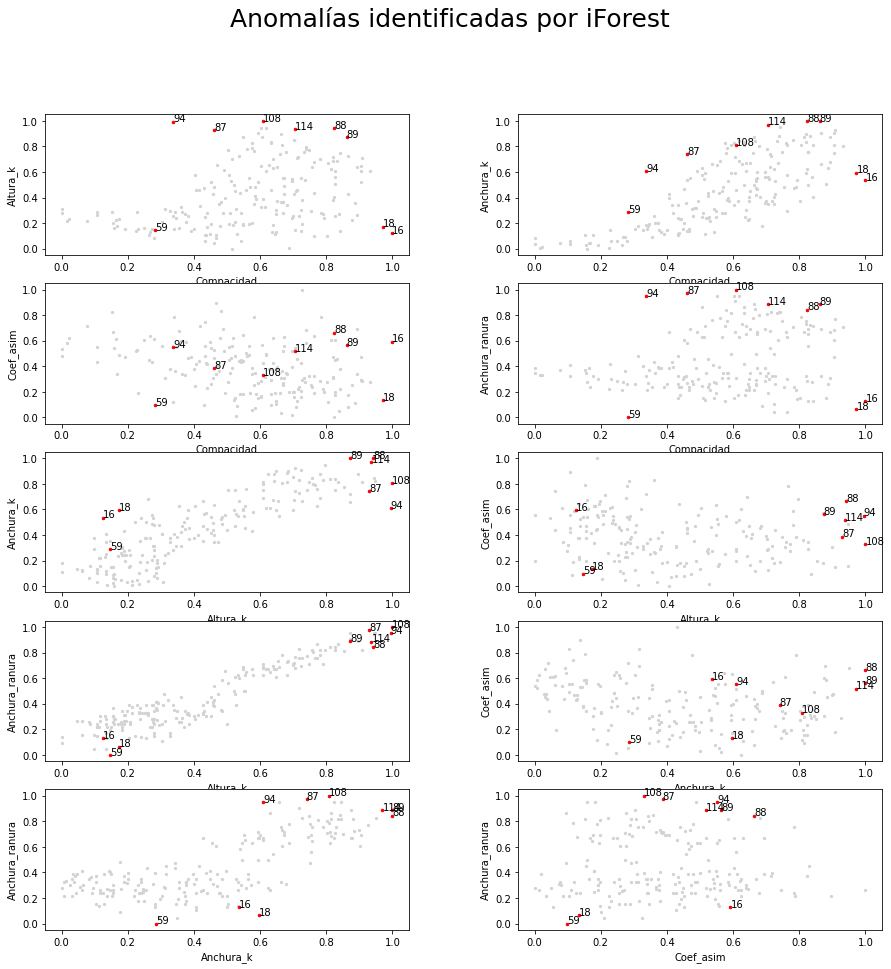

In [106]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 15), gridspec_kw={'wspace':0.3})
fig.suptitle('Anomalías identificadas por iForest', fontsize = 25)
list_outlier = seeds.index[outliers_seeds == 1]

for atr1 in range(seeds.shape[1]):
    for atr2 in range(atr1+1, seeds.shape[1]):
        plot_row = atr1
        plot_col = atr2-1

        if atr1 == 0 and atr2 == 3:
            plot_row = 1
            plot_col = 0
        if atr1 == 0 and atr2 == 4:
            plot_row = 1
            plot_col = 1
        if atr1 == 1 and atr2 == 2:
            plot_row = 2
            plot_col = 0
        if atr1 == 1 and atr2 == 3:
            plot_row = 2
            plot_col = 1
        if atr1 == 1 and atr2 == 4:
            plot_row = 3
            plot_col = 0
        if atr1 == 2 and atr2 == 3:
            plot_row = 3
            plot_col = 1
        if atr1 == 2 and atr2 == 4:
            plot_row = 4
            plot_col = 0
        if atr1 == 3 and atr2 == 4:
            plot_row = 4
            plot_col = 1
        

        ax[plot_row][plot_col].scatter(seeds.iloc[:, atr1], seeds.iloc[:, atr2], s=5, c='lightgray')
        ax[plot_row][plot_col].set_xlabel(seeds.columns[atr1])
        ax[plot_row][plot_col].set_ylabel(seeds.columns[atr2])

        for outlier in list_outliers_seeds:
            ax[plot_row][plot_col].scatter(seeds.loc[outlier, seeds.columns[atr1]], seeds.loc[outlier, 
                                           seeds.columns[atr2]], c='red', s=6)
            ax[plot_row][plot_col].text(seeds.loc[outlier, seeds.columns[atr1]], 
                                           seeds.loc[outlier, seeds.columns[atr2]], outlier)

